In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import acquire

# Store Items Data Exercises

## Exercise 1

Convert date column to datetime format.

In [2]:
# use a function to pull in data
df = acquire.get_store_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
# convert sale_data column to datetime
df.sale_date = pd.to_datetime(df.sale_date)

## Exercise 2

Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

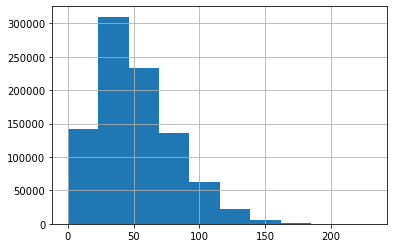

In [4]:
# plot the distribution of sale_amount
df.sale_amount.hist()

<AxesSubplot:>

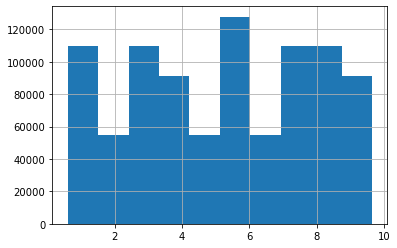

In [5]:
# plot the distribution of item_price
df.item_price.hist()

## Exercise 3

Set the index to be the datetime variable.

In [6]:
# set sale data as index and sort
df = df.set_index("sale_date").sort_index()

## Exercise 4

Add a 'month' and 'day of week' column to your dataframe.

In [7]:
# use assign to create 'month' and 'day of week' columns
df = df.assign(month = df.index.strftime('%B'), day_of_week = df.index.strftime('%A'))
df.head(3)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday


## Exercise 5

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [8]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40


## Exercise 6

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [9]:
def prepare_store_data():
    # use a function to pull in data
    df = acquire.get_store_data()
    # convert sale_data column to datetime
    df.sale_date = pd.to_datetime(df.sale_date)
    # set sale data as index and sort
    df = df.set_index("sale_date").sort_index()
    
    # use assign to create additional columns
    df = df.assign(month = df.index.strftime('%B'), 
                   day_of_week = df.index.strftime('%A'),
                  sales_total = df.sale_amount * df.item_price)
    
    return df

In [10]:
# check function
df = prepare_store_data()
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00
